In [119]:
import os
import sys
import re
from pathlib import Path

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
from larval_gonad.notebook import Nb
from larval_gonad.normalization import tpm

In [120]:
# Setup notebook
nbconfig = Nb.setup_notebook(seurat_dir='../output/scrnaseq-wf/scrnaseq_combine_force')

last updated: 2018-11-19 
Git hash:


In [121]:
ptrap = pd.read_parquet('../output/paper_submission/ptrap_scores.parquet')
ptrap.index = ptrap.index.droplevel('gene_symbol')

In [122]:
ptrap_fbgn = ptrap.index.get_level_values('FBgn').tolist()

In [123]:
raw = pd.read_parquet('../output/scrnaseq-wf/raw_by_cluster.parquet', columns=nbconfig.sel_cluster_order)
raw['Cyst Cells'] = raw[nbconfig.sel_cluster_order[4:7]].sum(axis=1)
raw = raw.reindex(columns=ptrap.columns)

In [124]:
gene_lens = pd.read_csv('../output/gene_ts_lengths.tsv', sep='\t', index_col=0).gene_ts_length

In [125]:
_tpm = tpm(raw, gene_length=gene_lens).dropna()

In [126]:
_tpm = _tpm.reindex(ptrap_fbgn)

In [133]:
tpm_rank = _tpm.rank(axis=1)
tpm_rank['source'] = 'expression'
tpm_rank.set_index('source', append=True, inplace=True)

In [134]:
ptrap_rank = ptrap.rank(axis=1)
ptrap_rank['source'] = 'ptrap'
ptrap_rank.set_index('source', append=True, inplace=True)

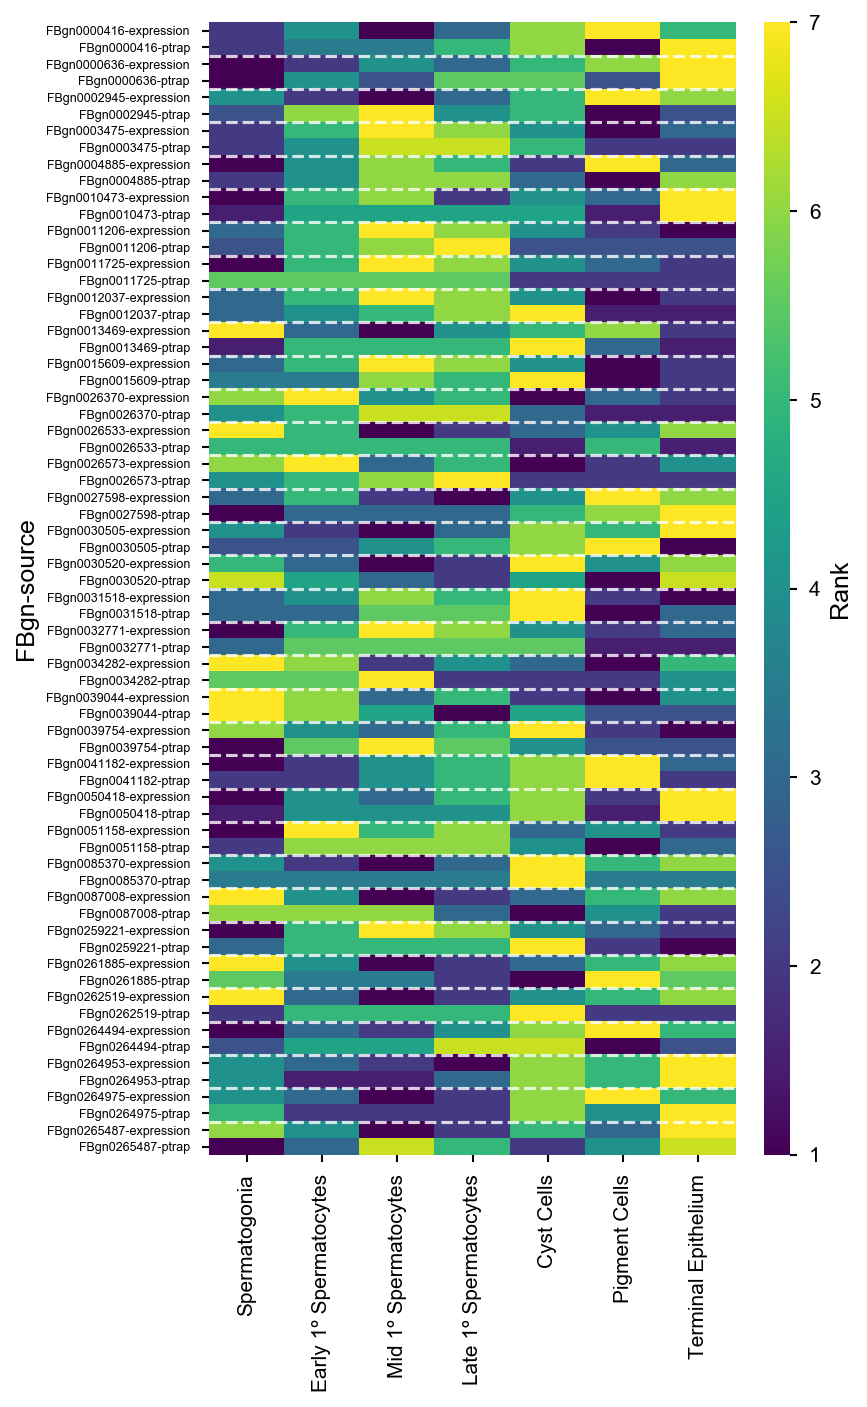

In [173]:
ranks = pd.concat([ptrap_rank, tpm_rank])
ranks.sort_index(inplace=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 10), gridspec_kw=dict(width_ratios=[1, .05], wspace=.1))
sns.heatmap(ranks, yticklabels=True, cmap='viridis', ax=ax1, cbar_ax=ax2, cbar_kws={'label': 'Rank'})

plt.setp(ax1.get_yticklabels(), fontsize=6);

for n in np.arange(68, step=2):
    if n == 0:
        continue
    ax1.axhline(n, color='w', ls='--', alpha=.8)

In [ ]:
germ = nbconfig.sel_cluster_order[:4]

In [195]:
tpm_germ = _tpm.loc[:, germ]
ptrap_germ = ptrap.loc[:, germ]

In [249]:
tpm_bin = _tpm > 1
tpm_bin['source'] = 'expression'
tpm_bin.set_index('source', append=True, inplace=True)

In [250]:
ptrap_bin = ptrap > 1
ptrap_bin['source'] = 'ptrap'
ptrap_bin.set_index('source', append=True, inplace=True)

[Text(1,0,'Off'), Text(1,1,'On')]

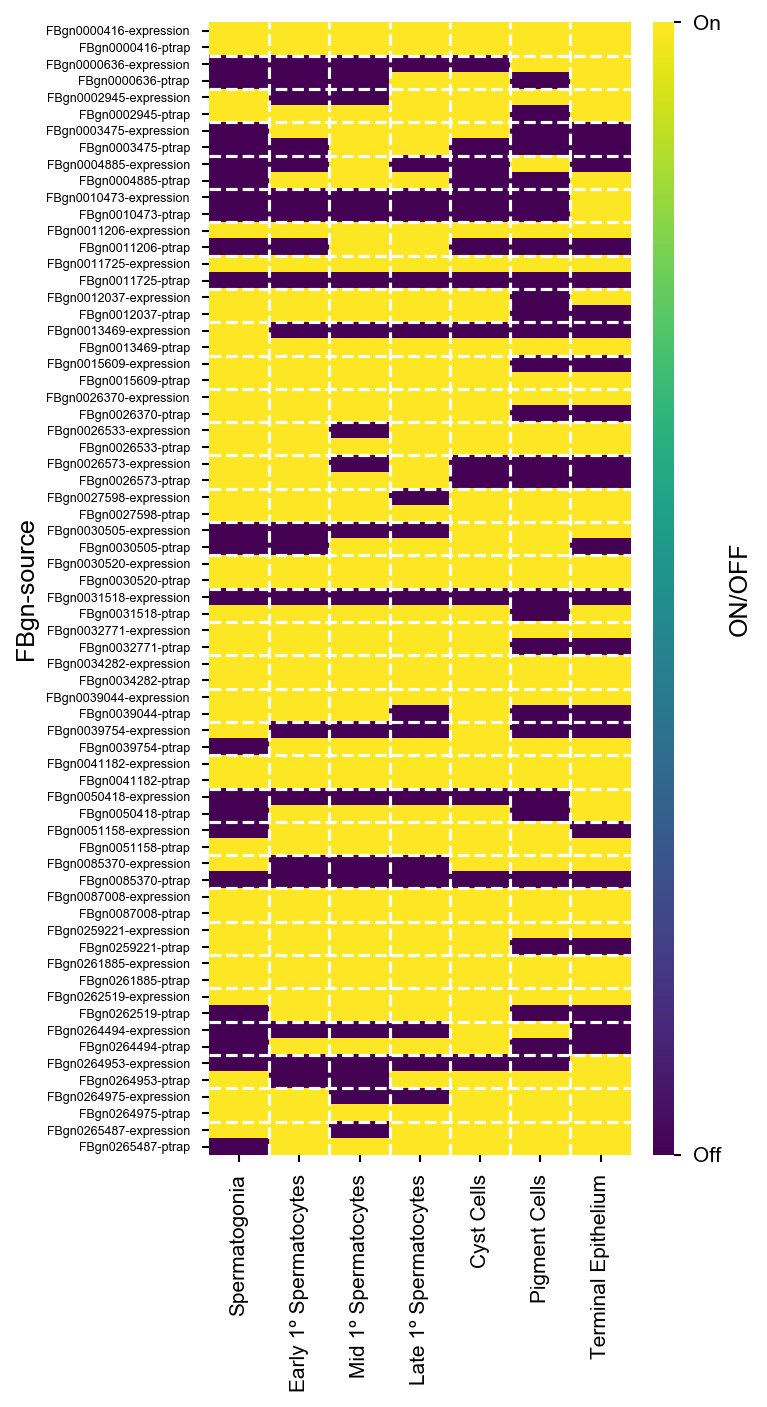

In [252]:
bins = pd.concat([ptrap_bin, tpm_bin])
bins.sort_index(inplace=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4, 10), gridspec_kw=dict(width_ratios=[1, .05], wspace=.1))
sns.heatmap(bins, yticklabels=True, cmap='viridis', ax=ax1, cbar_ax=ax2, cbar_kws={'label': 'ON/OFF', 'ticks': [0, 1]})

plt.setp(ax1.get_yticklabels(), fontsize=6);

for n in np.arange(68, step=2):
    if n == 0:
        continue
    ax1.axhline(n, color='w', ls='--')
    
ax1.axvline(1, color='w', ls='--')
ax1.axvline(2, color='w', ls='--')
ax1.axvline(3, color='w', ls='--')
ax1.axvline(4, color='w', ls='--')
ax1.axvline(5, color='w', ls='--')
ax1.axvline(6, color='w', ls='--')

ax2.set_yticklabels(['Off', 'On'])